[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/ipml/blob/master/tutorial_notebooks/8_data_prep_tasks.ipynb) 

# Data preparation


<hr>
<br>

This notebook revisits the data preparation lecture. We investigate options to scale and categorize continuous features and properly encode categorical features before using them in a machine learning model. Much of the needed functionality is readily available in `Pandas`. For certain tasks, we will use transformation classess available in `sklearn.preprocessing`.

For the notebook, we will make use of a novel dataset related to credit risk modeling. We begin with loading some standard packages.


In [1]:
# Load standard libraries
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# The HMEQ data set
Our data set, called the  "Home Equity" or, in brief, HMEQ, is available via the [CreditRiskAnalytics website ](https://www.creditriskanalytics.net). It comprises  information about a set of borrowers, which are categorized along demographic variables and variables concerning their business relationship with the lender. A binary target variable called *BAD* is  provided and indicates whether a borrower has repaid their debt. You can think of the data as a standard use case of binary classification.

The data set consists of 5,960 observations and 13 features including the target variable. The [website](https://www.creditriskanalytics.net) defines the variables as follows:

- BAD: the target variable, 1=default; 0=non-default 
- LOAN: amount of the loan request
- MORTDUE: amount due on an existing mortgage
- VALUE: value of current property
- REASON: DebtCon=debt consolidation; HomeImp=home improvement
- JOB: occupational categories
- YOJ: years at present job
- DEROG: number of major derogatory reports
- DELINQ: number of delinquent credit lines
- CLAGE: age of oldest credit line in months
- NINQ: number of recent credit inquiries
- CLNO: number of credit lines
- DEBTINC: debt-to-income ratio

As you can see, the features aim at describing the financial situation of a borrower. We will keep using the data set in future tutorials. Therefore, it makes sense to familiarize yourself with the above features.

## Loading the data
Let's start by loading the data and taking a look at the some entries. For simplicity, we provide a version in our [GitHub repository](https://github.com/Humboldt-WI/IPML/tree/main).

In [2]:
# Load the HMEQ Data from our GitHub
url = 'https://raw.githubusercontent.com/Humboldt-WI/IPML/master/data/hmeq.csv'
hmeq = pd.read_csv(url)
# Preview some entries
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
# Display column information
hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


## Altering Data Types
We start with a rather technical bit, data types. Recall the way our data is stored at the moment. 
The features *JOB* and *REASON* are stored as data type `object`. This is the most general data type in Python. A variable of this type can store pretty much any piece of data, numbers, text, dates, times, ... This generality has a price. Storing data as using type `object` consumes a lot of memory. Also, we cannot access specific functionality that is available for a specific data type only. Functions to manipulate text are an example. These are available for data of type `string` but not for data of type `object`. 
<br>
In our case, the two features that Pandas stores as objects are actually categorical variables. We can easily verify this using, e.g., the `value_counts` method, which reports for every unique entry of a variable the number of occurrences in the dataset.

In [4]:
print(hmeq.REASON.value_counts())  
print('--------------')
print(hmeq.JOB.value_counts()) 

REASON
DebtCon    3928
HomeImp    1780
Name: count, dtype: int64
--------------
JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64


Based on the output, you can learn that *REASON* is a binary variable, whereas *JOB* is a categorical varaible with six different levels.

 Knowing the two features with type object are categories, we should alter their data type accordingly. To that end, we make use of the function `astype`, which facilitates converting one data type into another. 

In [5]:
# Code categories properly 
hmeq['REASON'] = hmeq['REASON'].astype('category')
hmeq['JOB'] = hmeq['JOB'].astype('category')
hmeq.info()  # verify the conversion was successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   int64   
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(2), float64(9), int64(2)
memory usage: 524.3 KB


Although it does not really matter for this tiny data set, note that the conversion from object to category has reduced the amount of memory that the data frame consumes. On my machine, we need 524.2 KB after the translation, whereas we needed more than 600 KB for the original data frame. If you work with millions of observations the above conversion can result in a significant reduction of memory consumption. If memory consumption is an issue, we can achieve a significant further reduction by reducing the precision of the numerical variables. *Downcasting* from float64 to float32 is likely ok for predictive modeling. Also, the target variable is stored as an integer but we know that it has only two states, which indicate proper repayment of the loan or default. Thus, we can convert the target to a boolean. We perform these transformations in the next code demo. It does not introduce new Python concepts and is meant to simplify working with the data in the reminder. However, it is good practice to spend a little time on the codes and make sure you understand what is going on.

In [6]:
# The target variable has only two states so that we can store it as a boolean
hmeq['BAD'] = hmeq['BAD'].astype('bool')

# For simplicity, we also convert LOAN to a float so that all numeric variables are of type float
hmeq['LOAN'] = hmeq['LOAN'].astype(np.float64)

# Last, let's change all numeric variables from float64 to float32 to reduce memory consumption
num_vars = hmeq.select_dtypes(include=np.float64).columns
hmeq[num_vars] = hmeq[num_vars].astype(np.float32)

# Finally, let's verify the data types
hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   bool    
 1   LOAN     5960 non-null   float32 
 2   MORTDUE  5442 non-null   float32 
 3   VALUE    5848 non-null   float32 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float32 
 7   DEROG    5252 non-null   float32 
 8   DELINQ   5380 non-null   float32 
 9   CLAGE    5652 non-null   float32 
 10  NINQ     5450 non-null   float32 
 11  CLNO     5738 non-null   float32 
 12  DEBTINC  4693 non-null   float32 
dtypes: bool(1), category(2), float32(10)
memory usage: 250.7 KB


In total, our type conversions reduced memory consumption by more than a half, from an initial value of >600KB to 250.7 KB. Bear this potential in mind when using your computer to process larger datasets. Should you be interested in some more information on memory efficiency, have a look at this post at [TowardDataScience.com](https://towardsdatascience.com/pandas-save-memory-with-these-simple-tricks-943841f8c32). 

# Missing values
Our data contains many missing values. This is easily seen when calling, e.g., `hmeq.head(5)`, and is common when working with real data. Likewise, handling missing values is a standard task in data preparation. `Pandas` provides the function `.isna()` as entry point to the corresponding functionality and helps with identifying the relevant cases.

*Note*: `Pandas` also supports an equivalent function called `.isnull()`. 

In [7]:
# Boolean mask of same size as the data frame to access missing values via indexing
missing_mask = hmeq.isna()

print(f'Dimension of the mask: {missing_mask.shape}')
print(f'Dimension of the data frame: {hmeq.shape}')


Dimension of the mask: (5960, 13)
Dimension of the data frame: (5960, 13)


In [8]:
# Preview of the missing value mask
missing_mask


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,False,False,False,False,False,False,False,False,False,False,False,False
5956,False,False,False,False,False,False,False,False,False,False,False,False,False
5957,False,False,False,False,False,False,False,False,False,False,False,False,False
5958,False,False,False,False,False,False,False,False,False,False,False,False,False


We can count the number of missing values per row or per column or in total.

In [9]:
# missing values per row
miss_per_row = missing_mask.sum(axis=1)
print('Missing values per row:\n', miss_per_row)
print('-' * 50)
# missing values per column
miss_per_col = missing_mask.sum(axis=0)
print('Missing values per column:\n', miss_per_col )
print('-' * 50)
# count the total number of missing values
n_total_missing = missing_mask.sum().sum()
print(f'Total number of missing values: {n_total_missing}')
print('-' * 50)

Missing values per row:
 0        1
1        1
2        1
3       11
4        1
        ..
5955     0
5956     0
5957     0
5958     0
5959     0
Length: 5960, dtype: int64
--------------------------------------------------
Missing values per column:
 BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64
--------------------------------------------------
Total number of missing values: 5271
--------------------------------------------------


It can be useful to visualize the *missingness* in a dataset using a heatmap, as follows:  

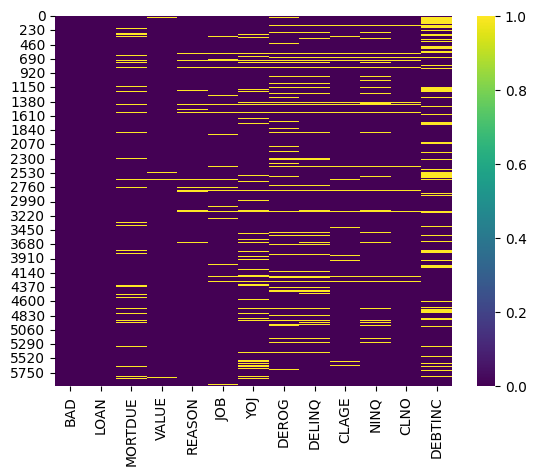

In [10]:
sns.heatmap(hmeq.isna(), cmap='viridis')  # quick visualization of the missing values in our data set
plt.show()

Note how the heatmap gives you a good intuition of how and where the dataset is affected by missing values.

## Categorical features
Let's start with the two categorical features, `REASON` and `JOB`. We will treat them differently for the sake of illustration. Now that we start altering our data frame more seriously, it is a good idea to make a copy of the data so that we can easily go back to a previous state.

In [27]:
# copy data: we continue with altering the variable df while we keep variable hmeq for the raw data
df = hmeq.copy()

### Adding a new category level
One way to treat missing values in a categorical feature is to introduce a new category level *IsMissing*. We will demonstrate this approach for the feature *REASON*. 
<br>One feature of the category data type in Pandas is that category levels are managed. We cannot add levels directly. Thus, before assigning the missing values our new category level *IsMissing*, we first need to introduce this level. We basically tell our data frame that *IsMissing* is another suitable entry for *REASON* next to the levels that already exist in the data frame. 

In [28]:
# Variable REASON: we treat missing values as a new category level.
# First we need to add a new level
df.REASON = df.REASON.cat.add_categories(['IsMissing'])

# Now we can do the replacement
df.REASON[df.REASON.isna() ] = "IsMissing"
df.REASON.head()

0      HomeImp
1      HomeImp
2      HomeImp
3    IsMissing
4      HomeImp
Name: REASON, dtype: category
Categories (3, object): ['DebtCon', 'HomeImp', 'IsMissing']

In [29]:
df.REASON.isna().sum()  # verify that no more missing values exist

0

### Mode replacement
For the feature *JOB*, which is multinomial, we replace missing values with the mode of the feature. Please note that this is a crude way to handle missing values. I'm not endorsing it! But you should have at least seen a demo. Here it is. 

In [30]:
# Verify the counts for different levels of the feature JOB manually
print(df.JOB.value_counts())

# Determine the mode
mode_of_job = df.JOB.mode()  # note that mode() returns a Series. 
mode_of_job = mode_of_job.iloc[0]  # Hence, to only get the mode value, we need to access the first element of the Series

print('-' * 50)
print(f'The mode of feature JOB is {mode_of_job}.')

JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64
--------------------------------------------------
The mode of feature JOB is Other.


For the actual replacement, we use the `fillna` method of Pandas. It allows us to specify a value that is used to replace all missing values in a feature.  

In [31]:
# replace missing values with the mode
df.JOB = df.JOB.fillna(mode_of_job)
print(f'Number of remaining missing values in feature JOB: {df.JOB.isna().sum()}')  # verify that no more missing values exist

Number of remaining missing values in feature JOB: 0


## Numerical features
We have a lot of numerical features. To keep things simple, we simply replace all missing values with the median. Again, this is  a crude approach that should be applied with care; if at all. However, it nicely shows how we can process several columns at once.

Further, we discuss in the lecture that it can be useful to indicate the presence of a missing value in a numerical feature by adding a corresponding dummy variable. Our code illustrates that approach as well. Whenever we perform median replacement for a numerical feature, we add a new binary feature that indicates whether the original value was missing or not.


<p align="left" class="alert">
  <img src="https://raw.githubusercontent.com/Humboldt-WI/demopy/main/missing_value_dummy.png" alt="Indicating missing value replacement using dummy variables" width="320" />
</p>

In [32]:
for col in df.select_dtypes(include='float32').columns:  # loop over all numeric columns
    if df[col].isna().sum() > 0:                         # check if there are any missing values in the current feature
        dummies_col_name = col + '_ismissing'            # name of the new dummy variable
        df[dummies_col_name] = df[col].isna().astype('int8')  # create the dummy variable indicating missingness
        m = df[col].median(skipna=True)                  # compute the median of that feature
        df[col].fillna(m, inplace=True)                  # replace missing values with the median
        print(f'Processed feature {col}: added dummy variable {dummies_col_name} and replaced missing values with median {m}.')


Processed feature MORTDUE: added dummy variable MORTDUE_ismissing and replaced missing values with median 65019.0.
Processed feature VALUE: added dummy variable VALUE_ismissing and replaced missing values with median 89235.5.
Processed feature YOJ: added dummy variable YOJ_ismissing and replaced missing values with median 7.0.
Processed feature DEROG: added dummy variable DEROG_ismissing and replaced missing values with median 0.0.
Processed feature DELINQ: added dummy variable DELINQ_ismissing and replaced missing values with median 0.0.
Processed feature CLAGE: added dummy variable CLAGE_ismissing and replaced missing values with median 173.46665954589844.
Processed feature NINQ: added dummy variable NINQ_ismissing and replaced missing values with median 1.0.
Processed feature CLNO: added dummy variable CLNO_ismissing and replaced missing values with median 20.0.
Processed feature DEBTINC: added dummy variable DEBTINC_ismissing and replaced missing values with median 34.8182601928710

In [17]:
# Verify there are no more missing values in the data
n_total_missing = df.isna().sum().sum()
if  n_total_missing == 0:
    print('Well done, no more missing values!')
else:
    print(f'Ups! There are still {n_total_missing} missing values.')


Well done, no more missing values!


In [18]:
# Revisit the data info. We expect to see several new columns for the introduced dummy variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BAD                5960 non-null   bool    
 1   LOAN               5960 non-null   float32 
 2   MORTDUE            5960 non-null   float32 
 3   VALUE              5960 non-null   float32 
 4   REASON             5960 non-null   category
 5   JOB                5960 non-null   category
 6   YOJ                5960 non-null   float32 
 7   DEROG              5960 non-null   float32 
 8   DELINQ             5960 non-null   float32 
 9   CLAGE              5960 non-null   float32 
 10  NINQ               5960 non-null   float32 
 11  CLNO               5960 non-null   float32 
 12  DEBTINC            5960 non-null   float32 
 13  MORTDUE_ismissing  5960 non-null   int8    
 14  VALUE_ismissing    5960 non-null   int8    
 15  YOJ_ismissing      5960 non-null   int8    
 16  DEROG_

# Exercises

## 1. Outliers
The lecture introduced a rule of thumb saying that, for a given feature, a feature value $x$ can be considered an outlier if 
$$x >q_3(X) + 1.5 \cdot IQR(X)$$

where $q_3(X)$ denotes the third quantile of the distribution of feature $X$ and $IQR(X)$ the corresponding inter-quartile range. In the same scope, we also discussed the idea of *capping* outliers, i.e., replacing outlier values with the threshold value given by the above equation.

<p align="left" class="alert">
  <img src="https://raw.githubusercontent.com/Humboldt-WI/demopy/main/outlier_treatment.png" alt="Indicating missing value replacement using dummy variables" width="640" />
</p>

Here are your tasks:

1. Use the `Pandas` method `quantile` to compute the third and first quartile of feature `LOAN`.
2. Compute the threshold value that a feature value $x$ must not exceed according to the above equation. Store the result in a variable. 
3. Use logical indexing to identify all upper outliers in the feature `LOAN`.
4. Create a new data frame that has no outliers in the feature `LOAN`. To that end: 
- Reuse your solution to task 3 to identify outliers using indexing
- Change the `LOAN` values for all outlier cases to the threshold you computed in step 2.

Follow-up, more advanced tasks:<br>

5. Write a custom function that implements the functionality you created in task 4. Make the feature to work on an argument of your function.
6. Call your custom function for all numerical features in the data frame. The goal is to create a data frame that does not have any upper outlier in any of its numerical features. To demonstrate the capabilities of your function, set the threshold to $3 \cdot IQR(X)$. This way, only extreme outliers will be removed.

In [ ]:
# Solutions to Exercise 1

## 2. Scaling numerical features
Another common data preparation task is scaling numerical features. The goal is to ensure that all features have the same scale. This is important for many machine learning algorithms. The lecture introduced two common scaling methods: min-max scaling and z-score scaling.


<p align="left" class="alert">
  <img src="https://raw.githubusercontent.com/Humboldt-WI/demopy/main/scaling_of_num_features.png" alt="Scaling numerical features" width="640" />
</p>


The `sklearn` library provides implementations of both approaches in the classes `MinMaxScaler` and `StandardScaler`, which are part of the module `preprocessing`. Experiment with these classes to solve the following exercises.

1. Import the class `MinMaxScaler` and `StandardScaler` from the module `preprocessing` in the library `sklearn`.
2. Familiarize yourself with the functioning of the `StandardScaler` using its documentation and other sources (e.g., web search). 
3. Test the `StandardScaler` by applying it to the numerical features `LOAN`. Afterwards, the scaled feature should have a mean of 0 and a standard deviation of 1. Write a few lines of code to verify this.
4. The use of the `MinMaxScaler` is similar to the `StandardScaler`. Apply the `MinMaxScaler` to all other numerical features in the data set. More specifically, 
- Create a new data frame that contains only the numerical features.
- Remove the feature `LOAN` from that data frame; as we already scaled it in task 3.
- Apply the `MinMaxScaler` to the new data frame.
- Write a few lines of code to verify that the scaling was successful. To that end, recall what the 'MinMaxScaler' does.
- Combine the scaled features with the feature `LOAN` and the categorical features in a new `DataFrame`.


In [ ]:
# Solutions to Exercise 2

## 3. Discretizing numerical features
Discretizing numerical features is another common data preparation task. The goal is to convert continuous numerical features into discrete bins or categories. This can be useful for certain types of analysis and modeling. 

<p align="left" class="alert">
  <img src="https://raw.githubusercontent.com/Humboldt-WI/demopy/main/binning_num_features.png" alt="Binning of numerical features" width="640" />
</p>


The `pandas` library provides the `cut` and `qcut` functions for this purpose.

1. Familiarize yourself with the `cut` and `qcut` functions in the `pandas` library using their documentation and other sources (e.g., web search).
2. Use the `cut` function to discretize the `LOAN` feature into 5 equal-width bins. Assign meaningful labels to each bin (e.g., 'Very Low', 'Low', 'Medium', 'High', 'Very High').
3. Verify the binning by displaying the first few rows of the data frame and checking the `LOAN` feature.
4. Use the `qcut` function to discretize the `MORTDUE` feature into 4 quantile-based bins. Assign meaningful labels to each bin (e.g., 'Q1', 'Q2', 'Q3', 'Q4').
5. Verify the binning by displaying the first few rows of the data frame and checking the `MORTDUE` feature.

Follow-up, more advanced tasks:<br>

6. Create a new data frame that includes the discretized `LOAN` and `MORTDUE` features along with the other original features.
7. Write a custom function that takes a data frame and a list of numerical features as input and returns a new data frame with all specified features discretized into a given number of bins using the `cut` function. Test your function on the numerical features in the data frame.

In [ ]:
# Solutions to Exercise 3

## 4. Encoding categorical features
Encoding categorical features is another important data preparation task. Machine learning algorithms require numerical input, so we need to convert categorical features into numerical format. The `pandas` library provides the `get_dummies` function for this purpose. This function will turn a categorical feature with k levels into k binary features, as shown in this example for a categorical feature COLOR:

**Original Table**

| ID | COLOR  |
|----|--------|
| 1  | Red    |
| 2  | Blue   |
| 3  | Green  |
| 4  | Red    |
| 5  | Green  |

**Table After Dummy Coding**

| ID | COLOR_Red | COLOR_Blue | COLOR_Green |
|----|-----------|------------|-------------|
| 1  | 1         | 0          | 0           |
| 2  | 0         | 1          | 0           |
| 3  | 0         | 0          | 1           |
| 4  | 1         | 0          | 0           |
| 5  | 0         | 0          | 1           |

Let's move on to some exercises.


1. Familiarize yourself with the `get_dummies` function in the `pandas` library using its documentation and other sources (e.g., web search).
2. Apply the `get_dummies` function to discretize the `REASON` feature. Assign meaningful column names to the resulting dummy variables.
3. Verify the result of the previous dummy-coding step. You should see that the `get_dummies` function has created three binary variables, one for each of the three levels of the *REASON* feature. Recalling the functioning of regression methods, you now face a problem. The three new dummy variables are **linearly dependent**. Regression models will not work with linearly dependent features. Redo task 3 but this time pay attention to the argument `drop_first`, which the `get_dummies` function offers. Set this argument in such a way that you avoid linear dependency among the created dummy variables. 

Additional, more advanced exercises:<br>

4. This task assumes you solved exercise 7 from the above tasks concerning discretization. If you have not done so, go back to the discretization exercises and solve all tasks including task 7.
5. Discretize all numerical features in the data frame using the custom function you created in task 7. Apply the `get_dummies` function to the discretized features in the resulting data frame while avoiding linear dependency. Next, create a data frame `df_all_dummy` that includes only the dummy-encoded features. 
6. Fit a logistic regression model to the `df_all_dummy` data frame. Use the class `LogisticRegression` from the module `sklearn.linear_model`. The handling of `LogisticRegression` is similar to the handling of `LinearRegression`, which we examined in [Tutorial 5](https://github.com/Humboldt-WI/IPML/blob/main/tutorial_notebooks/5_SML_for_regression_solutions.ipynb). Train the model using the `fit()` method. Then, print the estimated coefficients and compute the model's performance on the training set using the method `score()`.

In [ ]:
# Solutions to Exercise 4